1.	Bayesian Classification + Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score, confusion_matrix, accuracy_score
from scipy import stats
import warnings
warnings.simplefilter("ignore")


In [2]:
data = pd.read_csv('adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])


In [3]:
data['workclass'].replace('?', np.NaN, inplace=True)
data['occupation'].replace('?', np.NaN, inplace=True)
data['native_country'].replace('?', np.NaN, inplace=True)
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native_country'].fillna(data['native_country'].mode()[0], inplace=True)

In [4]:
columns_to_encode = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [5]:
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
cols = X_train.columns
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [7]:
# Bayesian Classification
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)
bayes_predictions = bayes_classifier.predict(X_test)

In [8]:
# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

In [9]:
def evaluate_model(predictions, model_name):
    recall1 = recall_score(y_test, predictions, pos_label=' >50K')
    f1 = f1_score(y_test, predictions, pos_label=' >50K')
    c_matrix = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)

    print(f"\nEvaluation metrics for {model_name}:")
    print("Recall: ", recall1)
    print("f1_score: ", f1)
    print("Accuracy Score: ", accuracy)
    print("Confusion Matrix:")
    conf_matrix = pd.DataFrame(data=c_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')


Evaluation metrics for Bayesian Classification:
Recall:  0.33354551241247615
f1_score:  0.44901456726649536
Accuracy Score:  0.8025487486565331
Confusion Matrix:


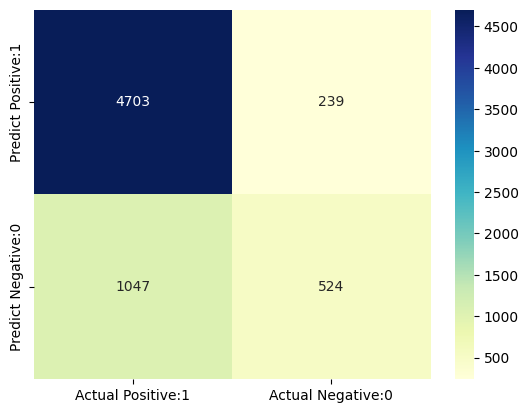

In [10]:
evaluate_model(bayes_predictions, "Bayesian Classification")


Evaluation metrics for Support Vector Machine:
Recall:  0.28516868236791854
f1_score:  0.4155844155844156
Accuracy Score:  0.806540764624597
Confusion Matrix:


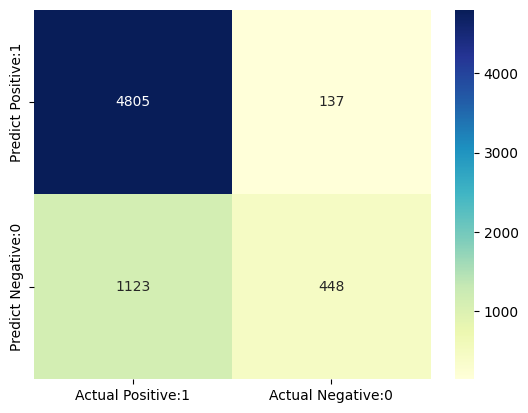

In [11]:
evaluate_model(svm_predictions, "Support Vector Machine")

In [12]:
train_accuracy_bayes = accuracy_score(y_train, bayes_classifier.predict(X_train))
test_accuracy_bayes = accuracy_score(y_test, bayes_predictions)

train_accuracy_svm = accuracy_score(y_train, svm_classifier.predict(X_train))
test_accuracy_svm = accuracy_score(y_test, svm_predictions)

print(f"Train Bayesian Classification accuracy score: {train_accuracy_bayes}")
print(f"Test Bayesian Classification accuracy score: {test_accuracy_bayes}")

print(f"Train SVM accuracy score: {train_accuracy_svm}")
print(f"Test SVM accuracy score: {test_accuracy_svm}")

if train_accuracy_bayes > test_accuracy_bayes:
    print('Bayesian Classification model may be overfitting')
else:
    print('Bayesian Classification model is not overfitting')

if train_accuracy_svm > test_accuracy_svm:
    print('SVM model may be overfitting')
else:
    print('SVM model is not overfitting')

Train Bayesian Classification accuracy score: 0.7991784398034398
Test Bayesian Classification accuracy score: 0.8025487486565331
Train SVM accuracy score: 0.8012899262899262
Test SVM accuracy score: 0.806540764624597
Bayesian Classification model is not overfitting
SVM model is not overfitting


In [13]:
t_statistic, p_value = stats.ttest_rel([test_accuracy_bayes], [test_accuracy_svm])
alpha = 0.05

In [14]:
if p_value < alpha:
    print('Різниця між моделями статистично значуща - відхиляємо Н0')
else:
    print('Різниця між моделями не статистично значуща - не відкидаємо Н0')

Різниця між моделями не статистично значуща - не відкидаємо Н0


2.	K nearest neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, metric='euclidean', k=5):
    knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn_model.fit(X_train, y_train)

    knn_predictions = knn_model.predict(X_test)

    recall = recall_score(y_test, knn_predictions, average='weighted')
    f1 = f1_score(y_test, knn_predictions,  average='weighted')
    confusion = confusion_matrix(y_test, knn_predictions)
    accuracy = accuracy_score(y_test, knn_predictions)

    return recall, f1, confusion, accuracy, knn_model

def visualize(X, y, model, metric, k):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.predict(X), cmap='viridis')
    plt.title(f'KNN Clusters with {metric} Metric (k={k})')
    plt.show()

k_neighbors = 6
metrics = ['euclidean', 'manhattan', 'minkowski']

In [17]:
data2 = pd.read_csv('teleCust1000t.csv')
X = data2.drop('custcat', axis=1)
y = data2['custcat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

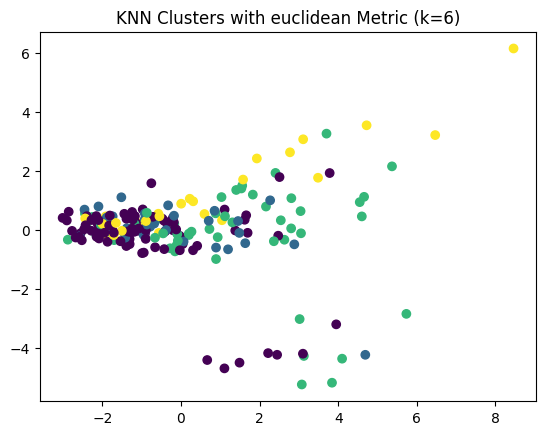

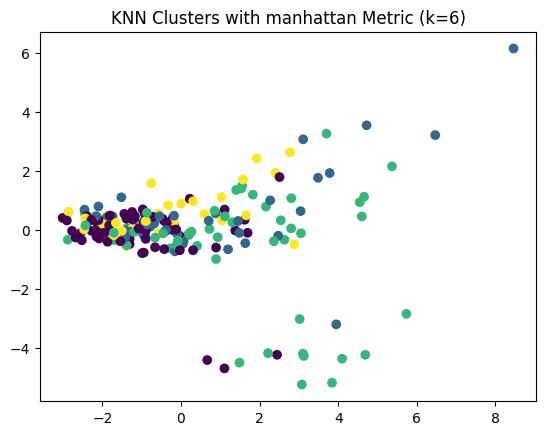

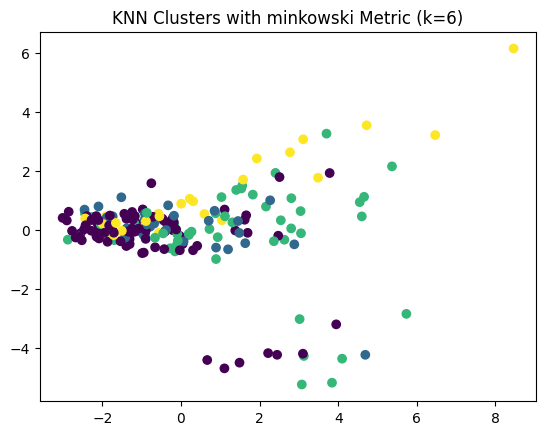

Metric: euclidean
    Recall: 0.325
    F1 Score: 0.31250375267477887
    Accuracy: 0.325


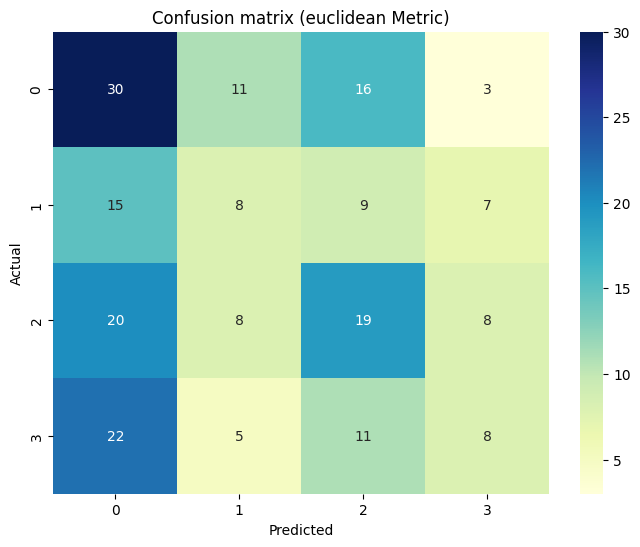

Metric: manhattan
    Recall: 0.335
    F1 Score: 0.3310883940620783
    Accuracy: 0.335


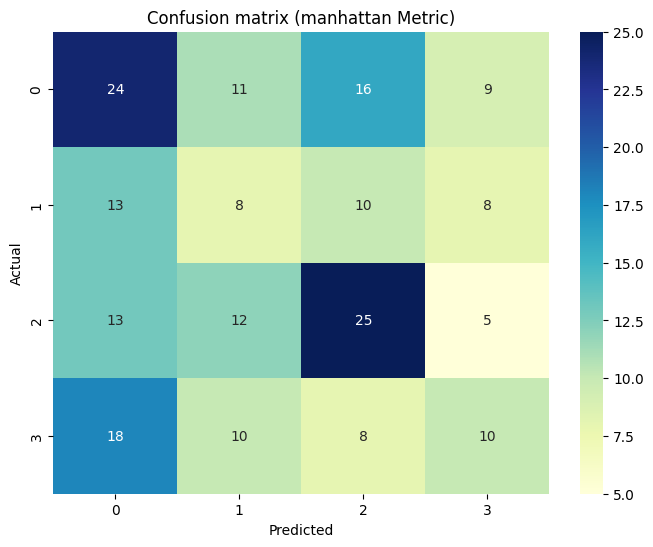

Metric: minkowski
    Recall: 0.325
    F1 Score: 0.31250375267477887
    Accuracy: 0.325


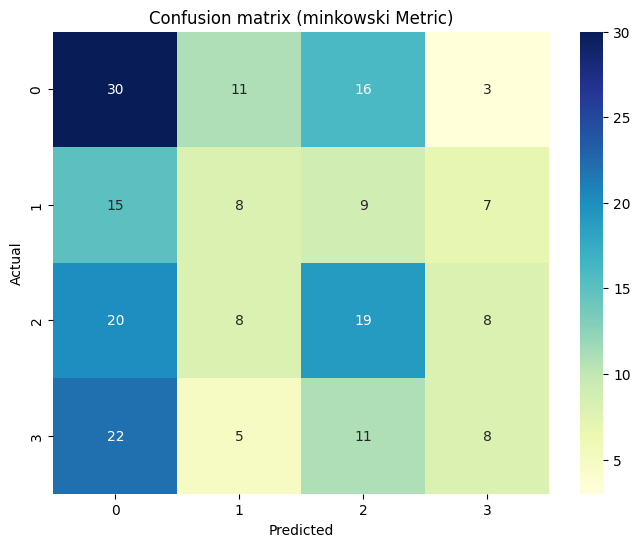

In [19]:
results = []

for metric in metrics:
    recall, f1, confusion, accuracy, knn_model = train_and_evaluate_knn(X_train, y_train, X_test, y_test, metric, k_neighbors)
    results.append({'Metric': metric, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': confusion, 'Accuracy': accuracy, 'KNN model':knn_model})
    visualize(X_test, y_test, knn_model, metric, k_neighbors)

for result in results:
    print(f"""Metric: {result['Metric']}
    Recall: {result['Recall']}
    F1 Score: {result['F1 Score']}
    Accuracy: {result['Accuracy']}""")
    plt.figure(figsize=(8,6))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion matrix ({result['Metric']} Metric)")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

3.	Agnes, Birch, DBSCAN

In [20]:
from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering, Birch, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

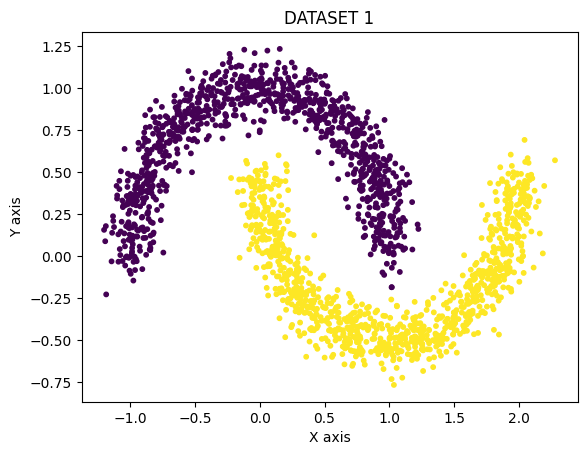

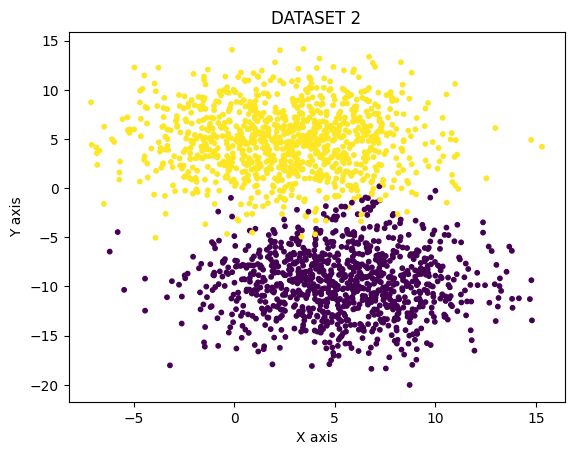

In [21]:
X1, Y1 = make_moons(n_samples=2000, noise=.09, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('DATASET 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

X2, Y2 = make_blobs(n_samples=2000, cluster_std=3.5, centers=2, n_features=2, random_state=10)
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=Y2)
plt.title('DATASET 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [22]:
agglomerative = AgglomerativeClustering(n_clusters=2)
birch = Birch(n_clusters=2)
dbscan = DBSCAN(eps=.2, min_samples=5)

datasets = [(X1,Y1, 'Dataset 1'), (X2,Y2, 'Dataset 2')]
cluster_models = [agglomerative, birch, dbscan]

In [23]:
results = []

for X,Y,dataset_name in datasets:
    for model in cluster_models:
        labels = model.fit_predict(X)
        silhouette = silhouette_score(X, labels)
        ari = adjusted_rand_score(Y, labels)
        nmi = normalized_mutual_info_score(Y, labels)
        results.append(f"""
        {dataset_name}, {model.__class__.__name__}
        Silhouette Coefficient: {silhouette}
        ARI: {ari}
        NMI: {nmi}
        """)

In [24]:
for res in results:
    print(res)


        Dataset 1, AgglomerativeClustering
        Silhouette Coefficient: 0.4062161591537881
        ARI: 0.7155769186783432
        NMI: 0.6713586477684496
        

        Dataset 1, Birch
        Silhouette Coefficient: 0.4583503187056948
        ARI: 0.3767076067566142
        NMI: 0.341366173543779
        

        Dataset 1, DBSCAN
        Silhouette Coefficient: 0.2565169878472582
        ARI: 0.0
        NMI: 0.0009941928229785931
        

        Dataset 2, AgglomerativeClustering
        Silhouette Coefficient: 0.5878339188420266
        ARI: 0.90816307882887
        NMI: 0.8427393441408568
        

        Dataset 2, Birch
        Silhouette Coefficient: 0.5431524473083246
        ARI: 0.7533026115565626
        NMI: 0.7031895934229431
        

        Dataset 2, DBSCAN
        Silhouette Coefficient: -0.6345258021400355
        ARI: 0.0009284826724144531
        NMI: 0.05429587739656559
        


4.	Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.manifold import TSNE

In [26]:
data4 = pd.read_csv('Mall_Customers.csv')

X = data4[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
affinity_propagation = AffinityPropagation(damping=0.9)
affinity_labels = affinity_propagation.fit_predict(X)

kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X)

In [28]:
silhouette_affinity = silhouette_score(X, affinity_labels)
ari_affinity = adjusted_rand_score(data4['CustomerID'], affinity_labels)
nmi_affinity = normalized_mutual_info_score(data4['CustomerID'], affinity_labels)

silhouette_kmeans = silhouette_score(X, kmeans_labels)
ari_kmeans = adjusted_rand_score(data4['CustomerID'], kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(data4['CustomerID'], kmeans_labels)

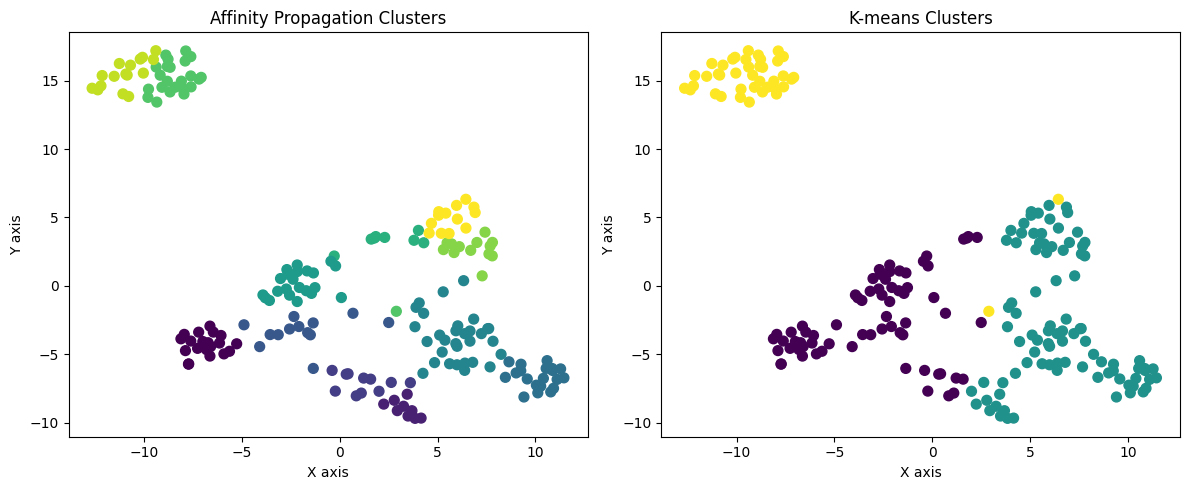

In [29]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=affinity_labels, cmap='viridis', s=50)
plt.title('Affinity Propagation Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.subplot(1,2,2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clusters')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.tight_layout()
plt.show()

In [30]:
print(f"""  
Affinity Propagation
    Silhouette Coefficient: {silhouette_affinity}
    ARI: {ari_affinity}
    NMI: {nmi_affinity}""")

print(f"""
K-Means
    Silhouette Coefficient: {silhouette_kmeans}
    ARI: {ari_kmeans}
    NMI: {nmi_kmeans}""")

  
Affinity Propagation
    Silhouette Coefficient: 0.36667189318854604
    ARI: 0.0
    NMI: 0.6252294886222641

K-Means
    Silhouette Coefficient: 0.357793388710272
    ARI: 0.0
    NMI: 0.33078616634487973
